## Chapter 3 - The value of time

Finance as a field of study is sometimes somewhat flippantly said to deal with the value of two things: *time* and *risk*. While this is not the whole story, there is a deal of truth in it. These are the two issues which is always present. We start our discussion by ignoring risk and only considering the implications of the fact that anybody prefers to get something earlier rather than later, or the value of time.

### 3.1 Present value
The present value is the current value of a stream of future payments. Let $C_t$ be the cash flow at time *t*. Suppose we have $N$ future cash flows that occur at times $t_1, t_2, ... t_N$.

To find the *present* value of these future cash flows one need a set of prices of future cash flows. Suppose $d_t$ is the price one would pay today for the right to receive one dollar at a future date *t*. Such a price is also called a *discount factor*. To complicate matters further such prices will differ depending on the riskiness of the future cash flows. For now we concentrate on one particular set of prices, the prices of riskless future cash flows. We will return to how one would adjust the prices for risky cash flows. If one knows the set of prices for future claims of one dollar, $d_1, d_2, ... d_n$ one would calculate the present value as the sum of the present values of the different elements.

$$PV = \sum_{N}^{t=1} d_{t_i}C_{t_i}$$

However, knowing this set of current prices for cash flows at all future dates is not always feasible, and
some way has to be found to simplify the data need inherent in such general present value calculations.

### 3.2 One interest rate with annual compounding
The best known way to simplify the present value calculation is to rewrite the discount factors in terms of interest rates, or yields, through the relationship:

$$d_t = \frac{1}{(1+r_t)^t}$$

where $r_t$ is the interest rate (usually termed the spot rate) relevant for a *t*-period investment. To further simplify this calculation one can impose that this interest rate *r* is constant for all periods. This is termed a flat term structure. We will in the next chapter relax this simplifying assumption. The prices for valuing the future payments $d_t$ is calculated from this interest rate:

$$d_t = \frac{1}{(1+r_t)^t`}$$

In this case one would calculate the present value of a stream of cash flows paid at discrete dates
$t = 1, 2 ... N$ as

$$PV=\sum_{t=1}^{N} \frac{C_t}{(1+r+)^t`}$$

#### Example

An investment project has an investment cost of 100 today, and produces cash flows of 75 each of the next two years. What is the Net Present Value of the project?

In [1]:
import numpy as np

c = np.array([-100, 75, 75])
t = np.array([0, 1, 2])
r = .1

print('Present value, 10 percent discretely compounding interest = {:.4f}'.format(
       np.npv(r, c)))

Present value, 10 percent discretely compounding interest = 30.1653


Given the assumption of a discrete, annual interest rate, there are a number of useful special cases of cash flows where one can calculate the present value in a simplified manner. Some of these are shown in the following exercises.

### 3.2.1 Internal rate of return
In addition to its role in simplifying present value calculations, the interest rate has some further use. The percentage return on an investment is a summary measure of the investment’s profitability. Saying that an investment earns 10% per year is a good way of summarizing the cash flows in a way that does not depend on the amount of the initial investment. The return is thus a relative measure of profitability. To estimate a return for a set of cash flows we calculate the internal rate of return. The *internal rate of return* for a set of cash flows is the interest rate that makes the present value of the cash flows equal to zero. When there is a uniquely defined internal rate of return we get a relative measure of the profitability of a set of cash flows, measured as a return, typically expressed as a percentage. Note some of the implicit assumptions made here. We assume that the same interest rate applies at all future dates (i.e. a flat term structure). The IRR method also assumes intermediate cash flows are reinvested at the internal rate of return.

Suppose the cash flows are $C_0, C_1, C_2, ... C_T$ . Finding an internal rate of return is finding a solution $y$ of the equation

$$\sum_{t=1}^{t=1}\frac{C_t}{(1+y)^t}-C_o=0$$

Note that this is a polynomial equation, and as $T$ becomes large, there in no way to find an explicit
solution to the equation. It therefore needs to be solved numerically. For well behaved cash flows, where we know that there is one IRR, the method implemented below is suitable, it is an iterative
process called bisection.

#### Example

We are considering an investment with the following cash flows at dates 0, 1 and 2:

        $C0 = -100, C_1 = 10, C_2 = 110$
1. The current interest rate (with discrete, annual compounding) is 5%. Determine the present value of
the cash flows.

2. Find the internal rate of return of this sequence of cash flows.

In [2]:
c = np.array([-100, 10, 110])
r = 0.05

print('present value, 5 percent discretely compounding interest = {:.5f}'.format(np.npv(r, c)))
print('internal rate of return, discrete compounding = {:.1f}'.format(np.irr(c)))

present value, 5 percent discretely compounding interest = 9.29705
internal rate of return, discrete compounding = 0.1


In addition to the above economic qualifications to interpretations of the internal rate of return, we also
have to deal with technical problem stemming from the fact that any polynomial equation has potentially
several solutions, some of which may be imaginary. By imaginary here we mean that we move away from
the real line to the set of complex numbers. In economics we prefer the real solutions, complex interest
rates are not something we have much intuition about... To see whether we are likely to have problems
in identifying a single meaningful IRR, the code shown in code 3.3 implements a simple check. It is only
a necessary condition for a unique IRR, not sufficient, so you may still have a well-defined IRR even
if this returns false. The first test is just to count the number of sign changes in the cash flow. From
Descartes rule we know that the number of real roots is one if there is only one sign change. If there is
more than one change in the sign of cash flows, we can go further and check the *aggregated* cash flows
for sign changes (See Norstrom (1972)).

In [3]:
%matplotlib inline
import seaborn as sns; sns.set(style='white')
import matplotlib.pyplot as plt

In [4]:
cf0 = np.array([-100, 10, 100])
npv_cf0 = np.ones(50)

for index, rate in enumerate(np.linspace(0, 0.12, 50)):
    npv_cf0[index] = np.npv(rate, cf0)

cf1 = np.array([-100, 201, -100])
npv_cf1 = np.ones(50)

for index, rate in enumerate(np.linspace(-0.2, .2, 50)):
    npv_cf1[index] = np.npv(rate, cf1)

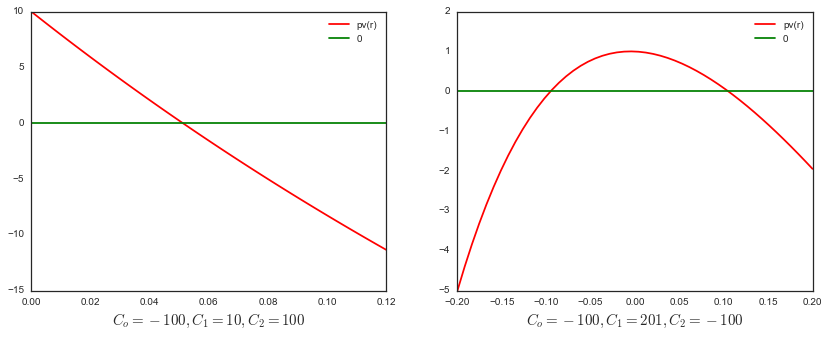

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].plot(np.linspace(0, 0.12, 50), npv_cf0, c='r', label='pv(r)')
ax[0].axhline(0, c='g', label=0)
ax[0].set_xlim(0, 0.12)
ax[0].set_xlabel('$C_o=-100, C_1=10, C_2=100$', fontsize=15)
ax[0].legend()

ax[1].plot(np.linspace(-0.2, .2, 50), npv_cf1, c='r', label='pv(r)')
ax[1].axhline(0, c='g', label=0)
ax[1].set_xlim(-.2, 0.2)
ax[1].set_xlabel('$C_o=-100, C_1=201, C_2=-100$', fontsize=15)
ax[1].legend();

### 3.3 Continously compounding interest
Such discrete compounding as we have just discussed is not the only alternative way to approximate the
discount factor. The discretely compounded case assumes that interest is added at discrete points in time
(hence the name). However, an alternative assumption is to assume that interest is added continously. If
compounding is continous, and $r$ is the interest rate, one would calculate the current price $d_t$ of reciving
one dollar at a future date $t$ as

$$d_t = e^{-rt}$$

some rules for translating between continously compounded and discretly compounded
interest rates.

$r=n\ln\Big(1+\frac{r_n}{n}\Big)$

$r_n= n \Big(e^{\frac{r}{n}}-1\Big)$

Future value = $e^{rt}$

Present value = $e^{-rt}$

Notation: $r_n$: interest rate with discrete compounding, $n$: compounding periods per year. $r$: interest rate with
continuous compounding, $t$: time to maturity.

#### Example
1. Given a 15% interest rate with monthly compounding, calculate the equivalent interest rate with continuous
compounding.
2. Given a 12% interest with continuous compounding, find the equivalent interest rate with quarterly
compounding.

In [6]:
r = 12 * np.log(1 + .15 / 12)
r4 = 4 * (np.exp(.12 / 4) - 1)

In [7]:
print(r)
print(r4)

0.149070239983
0.121818135814


### 3.3.1 Present value

Applying this to a set of cash flows at future dates $t_1, t_2, ... t_n$, we get the following present value calculation:

$$PV=\sum_{t=1}^{n} e^{-rt_i}C_{t_i}$$